Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

2023-09-23 17:25:05.767236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Importing dataset

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = False,
    vertical_flip = False
)

valid_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train_set = train_datagen.flow_from_directory(
    "Alzheimer_s Dataset/train",
    target_size = (128,128),
    batch_size = 32,
    color_mode = "rgb",
    shuffle = False,
    class_mode = "categorical"
)



test_set = test_datagen.flow_from_directory(
    "Alzheimer_s Dataset/test",
    target_size = (128,128),
    batch_size = 32,
    color_mode = "rgb",
    shuffle = False,
    class_mode = None
    
)


Found 5012 images belonging to 4 classes.
Found 1247 images belonging to 4 classes.


(32, 128, 128, 3)


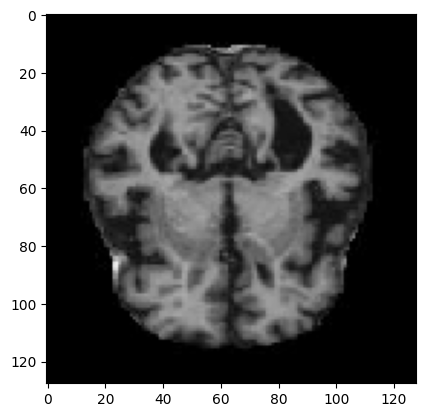

(32, 128, 128, 3)


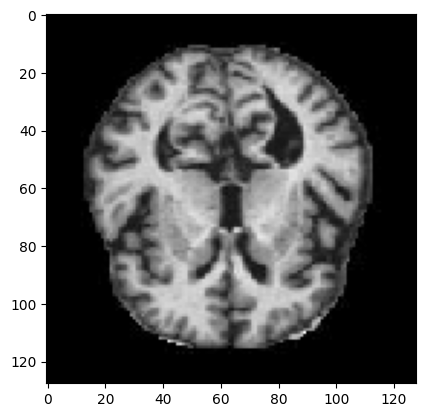

(32, 128, 128, 3)


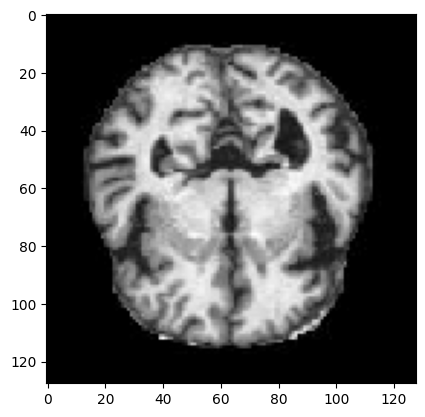

(32, 128, 128, 3)


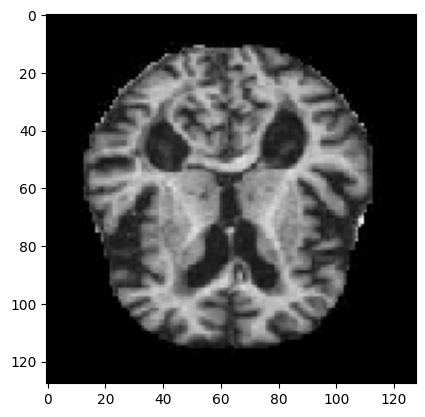

(32, 128, 128, 3)


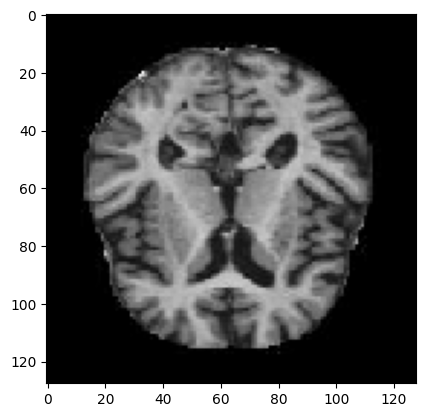

In [4]:
for _ in range(5):
    img, label = train_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = [128,128,3]))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))

In [11]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = cnn.fit(x = train_set, validation_data = test_set, epochs = 15)

Epoch 1/15
157/157 [==============================] - 46s 280ms/step - loss: 1.1342 - accuracy: 0.4842 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/15
157/157 [==============================] - 43s 272ms/step - loss: 1.0589 - accuracy: 0.5034 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/15
157/157 [==============================] - 43s 271ms/step - loss: 1.0542 - accuracy: 0.5030 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/15
157/157 [==============================] - 42s 270ms/step - loss: 1.0800 - accuracy: 0.4707 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/15
157/157 [==============================] - 42s 270ms/step - loss: 1.0339 - accuracy: 0.5066 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/15
157/157 [==============================] - 42s 268ms/step - loss: 0.9985 - accuracy: 0.5072 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/15
157/157 [==============================] - 42s 266ms/step - loss: 0.970

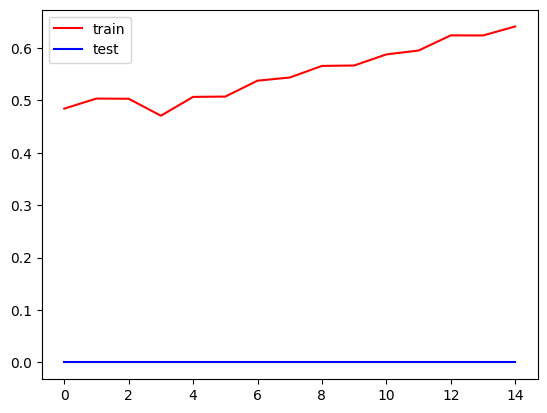

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label='test')
plt.legend()
plt.show()

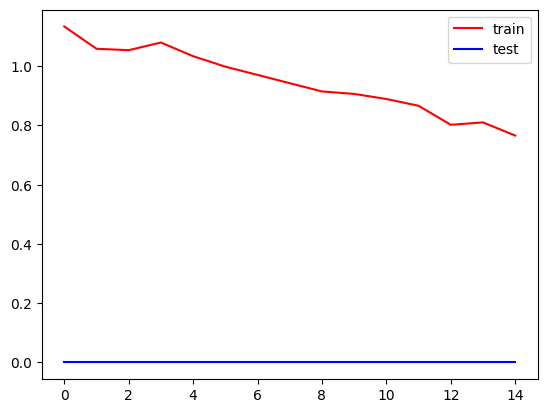

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'], color = 'blue', label='test')
plt.legend()
plt.show()